In [1]:
#import/install all packages at the top

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [2]:
#import and read file in df with pandas (for better visualisation)

filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)

df.head()

,comment_text,label
0,I suspect atheists are projecting their desire...,-1
1,It's funny how the arguments the shills are ma...,-1
2,We are truly following the patterns of how the...,-1
3,air pressure dropping as altitude goes higher....,-1
4,Absolutely. I think we'd be hard pressed to f...,-1


In [3]:
#counts number of each class 
df["label"].value_counts()

-1    1412
 1     537
Name: label, dtype: int64

In [4]:
#rename the columns
df.columns = ["Comment_Text", "Label"]

In [5]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

Comment_Text    0
Label           0
dtype: int64

In [6]:
print("This Irony dataset entails", len(df), "items")

This Irony dataset entails 1949 items


In [7]:
#Count number of ironic (1) and non-ironic (-1) comments in data

ironic = []
non_ironic = []

for x in df["Label"]:
    if x == 1:
        ironic.append(x)
    else:
        non_ironic.append(x)

print(f"The dataset enails a total of {len(ironic)} IRONIC comments") #27.55%
print(f"The dataset enails a total of {len(non_ironic)} NON-IRONIC comments") #72.45%
#537x100 / 1949 = 27.55%

The dataset enails a total of 537 IRONIC comments
The dataset enails a total of 1412 NON-IRONIC comments


# Split into Train (70), Validation (10) and Test (20) sets

-using scikit learn 'train_test_split' function twices gives the validation set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [10]:
#test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

#split the training set to get validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=43)

In [11]:
#pandas concat joins series together (i.e. dataframes)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print("The Train set entails:", len(train), "items") #70
print("The Test set entails:", len(test), "items")  #20
print("This Validation set entails:", len(val), "items")   #10

The Train set entails: 1364 items
The Test set entails: 390 items
This Validation set entails: 195 items


In [12]:
# pandas '.shape' to see dataframe in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


# Summaries of the distribution of comments by both labels (i.e. non-ironic = -1, ironic = 1)

- use matplotlib to create THREE bar charts for visualisation for each of the sets:
        (1) Train
        (2) Validation
        (3) Test

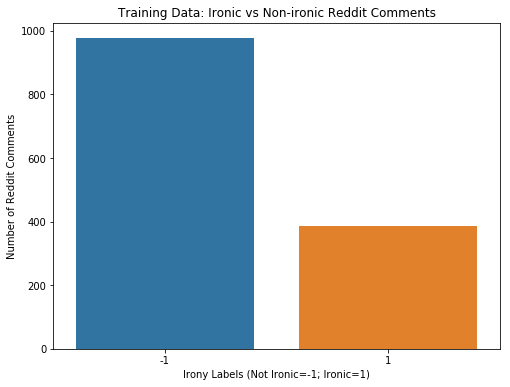

In [13]:
#TRAIN

fig = plt.figure(figsize=(8,6))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

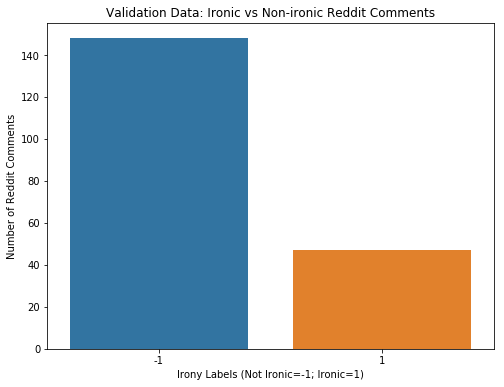

In [14]:
#VALIDATION

fig = plt.figure(figsize=(8,6))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

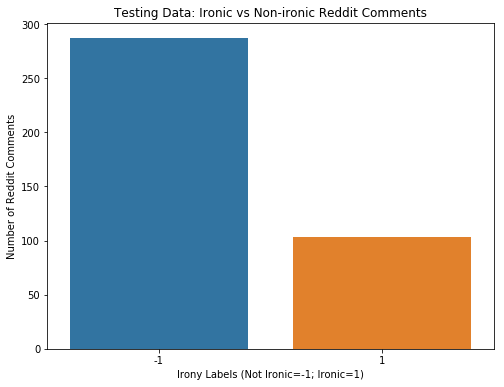

In [15]:
#TEST

fig = plt.figure(figsize=(8,6))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

In [16]:
#check format of train df

train.head()

,Label,Comment_Text
254,-1,Matthews must mistakenly think that if O'Reill...
331,1,Yep it is hard to get a good education and the...
1141,-1,/r/nottheonion
1642,-1,About. Fucking. Time.
1064,-1,The perimeters around this relaunching were ke...


# Split train set into "Ironic" and "Not-ironic" dataframes, then convert each into a 2 dictionaries

In [17]:
#Split the training set into Ironic and Not ironic, making 2 new dfs, with same headers
ironic_df = train[train["Label"] >= 1]
nonironic_df = train[train["Label"] <= -1]

print(f"Training data contains {len(ironic_df)} IRONIC comments")
print(f"Training data contains {len(nonironic_df)} NON- IRONIC comments")

Training data contains 387 IRONIC comments
Training data contains 977 NON- IRONIC comments


In [18]:
# #Convert into 2 dictionaries
ironic_dict = ironic_df.set_index(ironic_df.index).T.to_dict()
nonironic_dict = nonironic_df.set_index(nonironic_df.index).T.to_dict()

print(len(ironic_dict))
print(len(nonironic_df))
print(ironic_dict)

387
977


{331: {'Label': 1, 'Comment_Text': 'Yep it is hard to get a good education and therefor a good job when you are home schooled by the home schooled.'}, 25: {'Label': 1, 'Comment_Text': "So the question during their Twitter Q&amp;A about washing the sleaze off with a regular shower or with baby tears has been answered... it's baby tears while removing candy from said baby."}, 1225: {'Label': 1, 'Comment_Text': 'They hate us for our freedom.'}, 516: {'Label': 1, 'Comment_Text': 'Did he talk at all about how he places personal religious beliefs over the civil rights of others?'}, 117: {'Label': 1, 'Comment_Text': '&gt; "Here\'s a picture of my house"\n\nOh?  you dont have a house?  why not?'}, 422: {'Label': 1, 'Comment_Text': "Hell the KochGangsters bought Wisconsin they don't have to bother with little things like laws anymore."}, 1687: {'Label': 1, 'Comment_Text': 'Hey, in his defense the original constitution had no problem with slavery and put women in a lower social class.  Sounds bi

# Parse through SpaCy to get STATS (Function Lists):

-----Create list of functions for each:
- average word length
- average sentence length
- number of word types

In [19]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [20]:
def get_words(listx):
    """Take a list (already parsed through SpaCy) remove punctuation and return list of word tokens"""
    ir_clean_docs = [] #remove punctuation

    for x in listx:
        clean_list = []
        for y in x:
            if y.pos_ != 'PUNCT':
                clean_list.append(y)
        ir_clean_docs.append(clean_list)
    return ir_clean_docs

In [21]:
def get_punct(listx):
    """Take a list (already parsed through spacy), remove words and return list of punctuation ONLY"""
    ir_punct = [] #only punctuation

    for x in listx:
        clean_list = []
        for y in x:
            if y.pos_ == 'PUNCT':
                clean_list.append(y)
        ir_punct.append(clean_list)
    return ir_punct

In [22]:
def average_word_length(doc):
    """Take doc and return average word length"""
    for token in doc:
        word = token.text
        average_word_length = sum(len(word) for word in doc) / len(doc)
    return(average_word_length)

In [23]:
def average_sent_length(doc):
    """Take doc and return average sentence length"""
    sent_list = []

    for sent in doc.sents:
        len_sent = len(sent)
        sent_list.append(len_sent)

    total = sum(sent_list)
    leng = len(sent_list)

    average_sent_length = total / leng
    return(average_sent_length)

In [24]:
###NEED TO CHANGE AS DOESN'T RETURN AVERAGE FOR EACH (SAME NUMBER)##
#####
####################3

def relative_count_wordtypes(doc):
    """Return relative count for all word types i.e. nouns, pronouns, verbs etc"""
    pos_tags = []
    for token in doc:
        pos_tags.append(token.pos_)
    counting = Counter(pos_tags)
    
    leng = len(doc)
   
    for key, value in counting.items():
        for value in counting.values():
            ff = sum(leng for value in doc) / leng
            counting[key] = ff
    
    new_dict = dict(counting)
     
    return new_dict

In [25]:
# print(repr(ir_token_list))
#"/s" is indicative of irony... let's see


def check_sarcsymbol(comment_list):
    """Take a list of comments (parsed through SpaCy); return list of items if "/s" is present [Reddit "/s" = sarcasm]"""
    sarcsymb = []
    for x in comment_list:
        for y in x:
            if y.text == "/s":
                sarcsymb.append(x)
    return(sarcsymb)


In [26]:
def get_punct_average(punctuation_list, token_comment_list):
    """Take preprocessed list of punctuation and full token list (MUST be of equal length); 
    Returns list of the average for ALL punctuation (based on number overall of tokens)
    for each comment""" 

    punct_count = []
    for comment in punctuation_list:
        punct_count.append(len(comment))

    len_comment = []
    for comment in token_comment_list:
        len_comment.append(len(comment))
    
    punct_count, len_comment = np.array(punct_count), np.array(len_comment) 
    averages = (punct_count + len_comment)/2
    return averages

# IRONY:
1) Create a list of docs for every comment (with all tokens)
2) Create list of tokens (without punct)
3) Create a list of puncutation tokens)

# Parse through functions to get df with:
1) Average Word Length
2) Average Sentence Length
3) Average Number of each Word Type

In [27]:
#List of ALL tokens
ir_comment_list = []
for comment_index, label in ironic_dict.items():
    for key in label:
        text = label[key]
        if type(text) == str:
            ir_comment_list.append(nlp(text))

In [28]:
ironic_word_list = get_words(ir_comment_list)
ironic_punct_list = get_punct(ir_comment_list)

print(len(ironic_word_list))
print(len(ironic_punct_list))

387
387


In [29]:
#Create df for total, full returns for irony
Total_irony = pd.DataFrame({'Comment Parsed':ir_comment_list})
Total_irony["Tokens"] = ironic_word_list
Total_irony["Punctuation"] = ironic_punct_list
Total_irony.head()

,Comment Parsed,Tokens,Punctuation
0,"(Yep, it, is, hard, to, get, a, good, educatio...","[Yep, it, is, hard, to, get, a, good, educatio...",[.]
1,"(So, the, question, during, their, Twitter, Q&...","[So, the, question, during, their, Twitter, Q&...","[..., .]"
2,"(They, hate, us, for, our, freedom, .)","[They, hate, us, for, our, freedom]",[.]
3,"(Did, he, talk, at, all, about, how, he, place...","[Did, he, talk, at, all, about, how, he, place...",[?]
4,"(&, gt, ;, "", Here, 's, a, picture, of, my, ho...","[&, gt, Here, 's, a, picture, of, my, house, \...","[;, "", "", ?, ?, ?]"


In [30]:
#Average word length
wordl_list = []
for comment in ironic_word_list:
    wordl_list.append(average_word_length(comment))

#Create DataFrame for Summary of Irony STATS
summary_irony = pd.DataFrame({"Average Word Length": wordl_list})

In [31]:
#Average Sentence Length
ir_sentl_list = []
for x in ir_comment_list:
    ir_sentl_list.append(average_sent_length(x))

#Add to Summary of Irony STATS df
summary_irony["Average Sentence Length"] = ir_sentl_list
summary_irony.head()

,Average Word Length,Average Sentence Length
0,3.826087,24.0
1,4.636364,17.5
2,3.833333,7.0
3,4.444444,19.0
4,2.619048,9.0


In [32]:
# print(repr(ir_token_list))
#"/s" is indicative of irony... let's see

ir_sarcsymb = check_sarcsymbol(ir_comment_list)
ir_sarcsymb = (len(ir_sarcsymb))

In [33]:
ir_punct_avg = get_punct_average(ironic_punct_list, ir_comment_list)
print(len(ir_punct_avg))
summary_irony["Punctuation Richness"] = ir_punct_avg
summary_irony.head()

387


,Average Word Length,Average Sentence Length,Punctuation Richness
0,3.826087,24.0,12.5
1,4.636364,17.5,18.5
2,3.833333,7.0,4.0
3,4.444444,19.0,10.0
4,2.619048,9.0,16.5


# NO - IRONY:
1) Create a list of docs for every comment (with all tokens)
2) Create list of tokens (without punct)
3) Create a list of puncutation tokens)

# Parse through functions to get df with:
1) Average Word Length
2) Average Sentence Length
3) Average Number of each Word Type

In [34]:
#List of ALL tokens

non_ir_comment_list = []
for comment_index, label in nonironic_dict.items():
    for key in label:
        text = label[key]
        if type(text) == str:
            non_ir_comment_list.append(nlp(text))
print(len(non_ir_comment_list))  

977


In [35]:
#list of word tokens(without punct)
non_ironic_word_list = get_words(non_ir_comment_list)

#list of punctuations as tokens
non_ironic_puct_list = get_punct(non_ir_comment_list)

print(len(non_ironic_word_list))
print(len(non_ironic_puct_list))

977
977


In [36]:
#Create df for total, full returns for no-irony
Total_noirony = pd.DataFrame({'Comment Parsed':non_ir_comment_list})
Total_noirony["Tokens"] = non_ironic_word_list
Total_noirony["Punctuation"] = non_ironic_puct_list

In [37]:
Total_noirony.head()

,Comment Parsed,Tokens,Punctuation
0,"(Matthews, must, mistakenly, think, that, if, ...","[Matthews, must, mistakenly, think, that, if, ...",[.]
1,"(/r, /, nottheonion)","[/, nottheonion]",[/r]
2,"(About, ., , Fucking, ., , Time, .)","[About, , Fucking, , Time]","[., ., .]"
3,"(The, perimeters, around, this, relaunching, w...","[The, perimeters, around, this, relaunching, w...",[.]
4,"(Typical, liberal)","[Typical, liberal]",[]


In [38]:
#Average word length
nonir_wordl_list = []
for comment in non_ironic_word_list:
    nonir_wordl_list.append(average_word_length(comment))
# print(len(nonir_wordl_list))

#Create DataFrame for Summary of Irony STATS
summary_noirony = pd.DataFrame({"Average Word Length": nonir_wordl_list})
# summary_noirony.head()

In [39]:
#Average Sentence Length
nonir_sentl_list = []
for x in non_ir_comment_list:
    nonir_sentl_list.append(average_sent_length(x))
    
print(len(nonir_sentl_list))

# #Add to Summary of Irony STATS df
summary_noirony["Average Sentence Length"] = nonir_sentl_list
summary_noirony.head()

977


,Average Word Length,Average Sentence Length
0,4.750000,17.000000
1,6.000000,3.000000
2,3.600000,2.666667
3,5.285714,22.000000
4,7.000000,2.000000


In [40]:
non_ir_sarcsymb = check_sarcsymbol(non_ir_comment_list)
non_ir_sarcsymb = (len(non_ir_sarcsymb))

In [41]:
#uses punct function (basically takes total number of all punct and divides by number
#of overall tokens)
nonir_punct_avg = get_punct_average(non_ironic_puct_list, non_ir_comment_list)
#print(len(nonir_punct_avg))

summary_noirony["Punctuation Richness"] = nonir_punct_avg
summary_noirony.head()

,Average Word Length,Average Sentence Length,Punctuation Richness
0,4.750000,17.000000,9.0
1,6.000000,3.000000,2.0
2,3.600000,2.666667,5.5
3,5.285714,22.000000,11.5
4,7.000000,2.000000,1.0


# Get Total Stats JOINT - Summary in Pandas DF 
- average/mean for:
        (1)relative word counts
        (2)word length
        (3)sentence length

In [42]:
#AVERAGE WORD LENGTH summary

ir_dist_word = summary_irony["Average Word Length"].mean() #print(ir_dist_word)
non_ir_dist_word = summary_noirony["Average Word Length"].mean()# print(non_ir_dist_word)


In [43]:
#AVERAGE SENTENCE LENGTH summary
ir_dist_sent = summary_irony["Average Sentence Length"].mean() # print(ir_dist_sent)
non_ir_dist_sent = summary_noirony["Average Sentence Length"].mean()# print(non_ir_dist_sent)

In [44]:
#AVERAGE PUNCTUATION RICHNESS summary
ir_dist_punct = summary_irony["Punctuation Richness"].mean()
non_ir_dist_punct = summary_noirony["Punctuation Richness"].mean()

In [45]:
#Create a Summary Stats dataframe (view both ironic/non-ironic average stats
summary_stats = pd.DataFrame(columns=["Average Word Length","Average Sentence Length"], index=["Ironic Comments", "Non-ironic Comments"])

summary_stats["Average Word Length"] = ir_dist_word, non_ir_dist_word
summary_stats["Average Sentence Length"] = ir_dist_sent, non_ir_dist_sent
summary_stats["Number of '/s' symbols"] = ir_sarcsymb, non_ir_sarcsymb
summary_stats["Punctuation Richness"] = ir_dist_punct, non_ir_dist_punct

summary_stats

,Average Word Length,Average Sentence Length,Number of '/s' symbols,Punctuation Richness
Ironic Comments,4.304183,14.261968,3,18.701550
Non-ironic Comments,4.411010,15.805244,0,32.517912


# Visualisation for Summary of all Statistics (for ironic vs non-ironic)
- YAAAAS actually got it to work and make it look cool

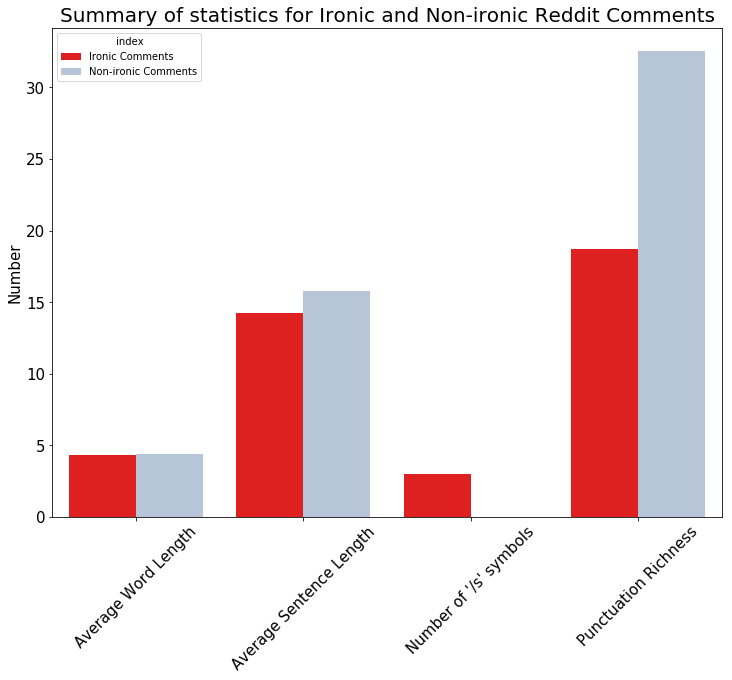

In [46]:
# summary_stats.plot.bar()

reset_indexbar = summary_stats.reset_index().melt(id_vars=["index"]) 
#summary_stats.head()

plt.figure(figsize=(12,9)) #size on-screen
sns.barplot(x="variable", y="value", hue="index", data=reset_indexbar, palette=["red", "lightsteelblue"] )
plt.xticks(rotation=45)

# #instead of palette, try -- color = "lightsteelblue"

plt.title("Summary of statistics for Ironic and Non-ironic Reddit Comments", fontsize=20)
plt.ylabel("Number", fontsize=15)
plt.xlabel("")
#plt.xlabel("Statistics Type", fontsize=15)
plt.tick_params(labelsize=15)


# ----Liiizzzzaaaa! we could definitely use a pre-built sentiment analysis classifier to then get a list of positive/negative/neutral results
--- our project is to focus on the irony side and sentiment could be a feature of that ;)

1)Add to summary for each irony/no-irony df as additional column for each comment
     
     E.g.      NON-IRONIC               IRONIC
     
         1.    positive                 negative
         2.    positive                 positive
         3.    negative   - etc         negative


2)Whatever is more frequent in those lists then will get added to total STATS (master) list

     E.g.      NON-IRONIC               IRONIC
               positive                 negative     
         

*) naive bayes 

*) from nltk.sentiment.vader import SentimentIntensityAnalyzer

   sentiment_analyzer = SentimentIntensityAnalyzer()

*) Other?????

# It's the end of the road...
# All pete tong from here


lol was? was hast du gesagt?? i zink i am going crazie

# SpaCy Continued: Text Processing 

- stopwords, punctuation, lemmatize

- (need to run named entity recognition AND sentiment analysis)

[sentiment analysis - ironic ones should typically be more negative....]

In [47]:
##NUMBER OF EACH PUNCT MARK
##LEMMATIZE
##SENTIMENT ANALYSIS
##NAMED ENTITY RECOGNITION
##NUMBER OF "LIKES"/"AS"??? for similies?? indicative of irony??

In [48]:
spacy.explain("nsubj")

'nominal subject'

In [49]:
#\\n\\n between comments 

In [50]:
#convert dictionaries into pandas df for better visualisation/comparison
df_punct = pd.DataFrame(ir_pun_dict, index=["Ironic Comments", "Non-ironic Comments"])
df_punct.iloc[1] = non_ir_pun_dict

df_punct

##see if can switch round (columns vs rows)

#how to get an average

NameError: name 'ir_pun_dict' is not defined

In [ ]:
ax = sns.barplot(x="#" ,y="index",color='lightsteelblue',data=df)

In [ ]:
# stopwords = list(STOP_WORDS)
# stopwords

In [ ]:
def get_entities(doc):
    for ent in doc.ents:
        print(f"Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}")
        
#     d = {}
#     for ent in doc.ents:
#         if ent not in d:
#             d["Entity"] = [ent]
#             d["Label"] = ent.label_
#             d["Explain"] = spacy.explain(ent.label_)
#         else:
#             pass
#     return d

In [ ]:
ir_ents = get_entities(ir_doc)
non_ir_ents = get_entities(non_ir_doc)
print(ir_ents)

#print(type(non_ir_ents))

##want to convert to pandas df after BUT CANT DO THIS DICT GRRRR

In [ ]:
#Check this out below! i've hashtagged it as its long but if you download the file and unhashtag it, it automatically does the NER for you and visualises it sick!

In [ ]:
ir_ent_visual = spacy.displacy.render(ir_doc, style="ent", jupyter=True)

In [ ]:
non_ir_ent_visual = spacy.displacy.render(non_ir_doc, style="ent", jupyter=True)

In [ ]:
#get PERSON names

def get_PERSON_names(doc):
    PERSON_names = set()
    for token in doc:
        if token.ent_type_ == "PERSON":
            PERSON_names.add(token)
        else:
            pass
    return PERSON_names

In [ ]:
ir_PERSON = get_PERSON_names(ir_doc)
non_ir_PERSON = get_PERSON_names(non_ir_doc)

print(non_ir_PERSON)